Import Everything

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import cv2
import image_lib as il

Read Image

In [3]:
image = cv2.imread('Lena.jpg')
il.show_image(image, 'Original Image')

Create Kernels

In [4]:
smoothing_kernel = il.Gaussian_Smoothing_kernel(5, 1.67)
sharpening_kernel = il.Gaussian_Sharpenning_kernel(7, 1.67)
print("Smoothing Kernel:\n", smoothing_kernel)
print("Sharpening Kernel:\n", sharpening_kernel)

Smoothing Kernel:
 [[0.00687486 0.02015726 0.02885054 0.02015726 0.00687486]
 [0.02015726 0.05910157 0.08459048 0.05910157 0.02015726]
 [0.02885054 0.08459048 0.12107208 0.08459048 0.02885054]
 [0.02015726 0.05910157 0.08459048 0.05910157 0.02015726]
 [0.00687486 0.02015726 0.02885054 0.02015726 0.00687486]]
Sharpening Kernel:
 [[ 0.3743708   0.4759443   0.48241797  0.4581773   0.48241797  0.4759443
   0.3743708 ]
 [ 0.4759443   0.41181675  0.05097389 -0.18624893  0.05097389  0.41181675
   0.4759443 ]
 [ 0.48241797  0.05097389 -0.95392907 -1.5428135  -0.95392907  0.05097389
   0.48241797]
 [ 0.4581773  -0.18624893 -1.5428135  -2.3201823  -1.5428135  -0.18624893
   0.4581773 ]
 [ 0.48241797  0.05097389 -0.95392907 -1.5428135  -0.95392907  0.05097389
   0.48241797]
 [ 0.4759443   0.41181675  0.05097389 -0.18624893  0.05097389  0.41181675
   0.4759443 ]
 [ 0.3743708   0.4759443   0.48241797  0.4581773   0.48241797  0.4759443
   0.3743708 ]]


Dividing Channel

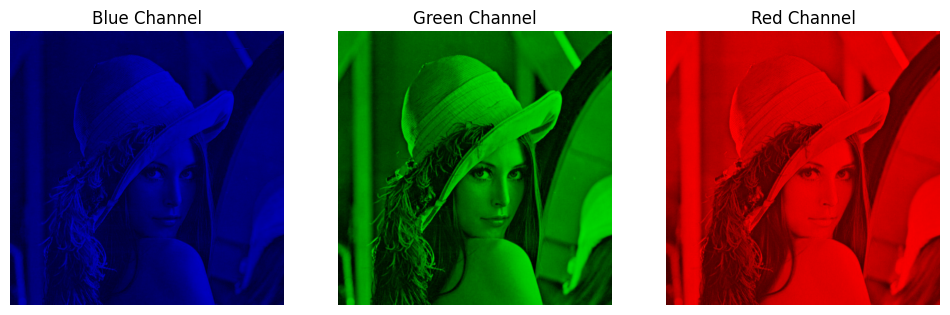

In [5]:
b = image[:, :, 0]
g = image[:, :, 1]
r = image[:, :, 2]
# Create color images for visualization
blue_img = np.zeros_like(image)
blue_img[:, :, 0] = b

green_img = np.zeros_like(image)
green_img[:, :, 1] = g

red_img = np.zeros_like(image)
red_img[:, :, 2] = r

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(blue_img, cv2.COLOR_BGR2RGB))
# plt.imshow(b,cmap="gray")
plt.title('Blue Channel')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(green_img, cv2.COLOR_BGR2RGB))
plt.title('Green Channel')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(red_img, cv2.COLOR_BGR2RGB))
plt.title('Red Channel')
plt.axis('off')
plt.savefig('SplitChannels.png')

Smooth Kernel Applied

In [6]:
def smooth_image(image):
    b_channel ,g_channel ,r_channel = cv2.split(image)
    smooth_convolved_b = il.convolve(b_channel, smoothing_kernel)
    smooth_convolved_g = il.convolve(g_channel, smoothing_kernel)
    smooth_convolved_r = il.convolve(r_channel, smoothing_kernel)
    smooth_convolved_image = cv2.merge((smooth_convolved_b, smooth_convolved_g, smooth_convolved_r))
    normalized_result = cv2.normalize(smooth_convolved_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    return normalized_result
il.show_image(smooth_image(image), 'Smoothed Image')


Individual Convolved Channel

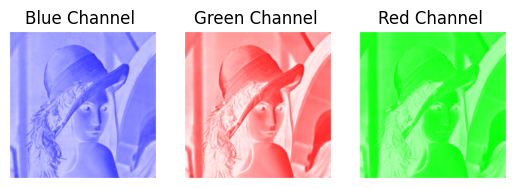

In [7]:
def individual_channel_convolution(image , kernel):
    b, g, r = cv2.split(image)
    b_channel_convolved = il.convolve(b, kernel)
    blue_img = np.zeros_like(image)
    blue_img[:, :, 0] =255
    blue_img[:,:,1] = 255 - b_channel_convolved 
    blue_img[:,:,2] = 255 - b_channel_convolved 

    r_channel_convoled = il.convolve(r,kernel)
    red_channel = np.zeros_like(image)
    red_channel[:,:,1] = 255
    red_channel[:,:,0] = 255 - r_channel_convoled
    red_channel[:,:,2] = 255 - r_channel_convoled

    g_channel_convoled = il.convolve(g, kernel)
    green_channel = np.zeros_like(image)
    green_channel[:,:,2] = 255 
    green_channel[:,:,1] = 255 - g_channel_convoled 
    green_channel[:,:,0] = 255 - g_channel_convoled

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(blue_img, cv2.COLOR_BGR2RGB))
    plt.title('Blue Channel ')
    plt.axis('off')
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(green_channel, cv2.COLOR_BGR2RGB))
    plt.title('Green Channel ')
    plt.axis('off')
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(red_channel, cv2.COLOR_BGR2RGB))
    plt.title('Red Channel ')
    plt.axis('off')
    plt.savefig('IndividualChannelConvolution.png')
individual_channel_convolution(image , smoothing_kernel)

Sharp Kernel Applied

In [8]:
def sharp_image(image):
    b_channel ,g_channel ,r_channel = cv2.split(image)
    sharp_convolved_b = il.convolve(b_channel, sharpening_kernel)
    sharp_convolved_g = il.convolve(g_channel, sharpening_kernel)
    sharp_convolved_r = il.convolve(r_channel, sharpening_kernel)
    sharp_convolved_image = cv2.merge((sharp_convolved_b, sharp_convolved_g, sharp_convolved_r))
    normalized_result = cv2.normalize(sharp_convolved_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    return normalized_result
il.show_image(sharp_image(image), 'Sharpened Image')

Individual Sharp Convolved

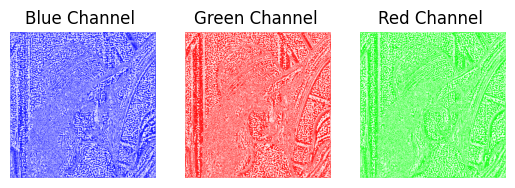

In [9]:
individual_channel_convolution(image , sharpening_kernel)

Plotting Comparision between image

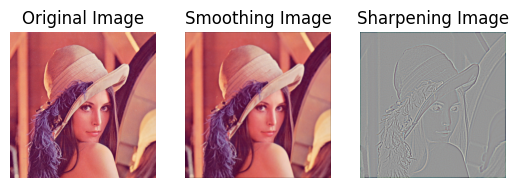

In [10]:
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(smooth_image(image), cv2.COLOR_BGR2RGB))
plt.title('Smoothing Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(sharp_image(image), cv2.COLOR_BGR2RGB))
plt.title('Sharpening Image')
plt.axis('off')
plt.savefig('smoothing_sharpening_comparison Color.png')
plt.show()

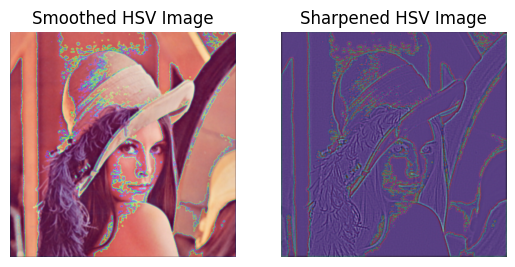

In [12]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
smooth_hsv = smooth_image(hsv_image)
sharp_hsv = sharp_image(hsv_image)
il.show_image(smooth_hsv, 'Smoothed HSV Image')
il.show_image(sharp_hsv, 'Sharpened HSV Image')
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(smooth_hsv, cv2.COLOR_HSV2RGB))
plt.title('Smoothed HSV Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(sharp_hsv, cv2.COLOR_HSV2RGB))
plt.title('Sharpened HSV Image')
plt.axis('off')
plt.savefig('smoothing_sharpening_comparison HSV.png')
plt.show()